# Alpha and Beta

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2021-10-19 20:10:34--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.1s    

2021-10-19 20:10:34 (1.71 MB/s) - ‘SPY.csv’ saved [251935/251935]

--2021-10-19 20:10:35--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  9.98MB/s    in 2.4s    

2021-10-19 20:1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
spy['SPY'] = spy['Close'].pct_change(1)

In [5]:
index = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)

In [6]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [7]:
aapl['AAPL'] = aapl['Close'].pct_change(1)

In [8]:
joined = aapl[['AAPL']].join(spy['SPY'])
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


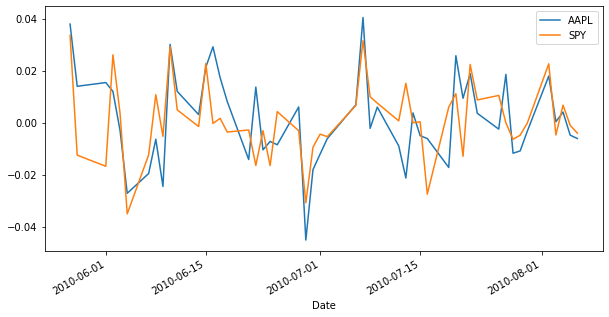

In [9]:
# plot Apple vs market for a period of time
joined.iloc[100:150].plot(figsize=(10,5));

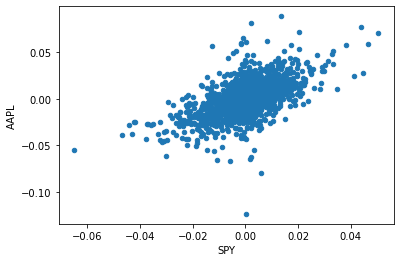

In [10]:
# look at the correlation
joined.plot.scatter('SPY', 'AAPL');

In [11]:
# prep the data for modeling
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [12]:
# confirm nx1 arrays
X.shape, Y.shape

((2262, 1), (2262, 1))

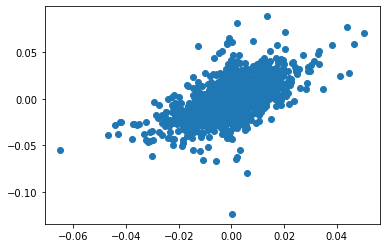

In [13]:
# confirm same plot as above
plt.scatter(X, Y);

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

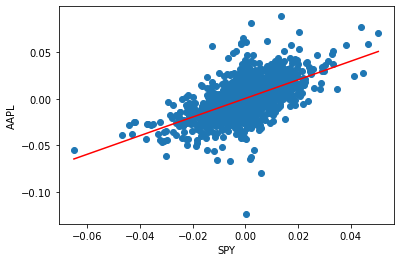

In [18]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict, color='red');

In [19]:
# determine alpha and beta
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

In [20]:
# but compare the risk (as measured by the standard dev)
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [21]:
# higher risk -> higher reward
joined['AAPL'].std() / joined['SPY'].std()

1.7179632360403783